In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

%matplotlib inline

# Data Preprocessing

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:, 3:-1].values
y = df.iloc[:,-1].values

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

**handling categorical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2]) 

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Encoding Country

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough' )
X = np.array(ct.fit_transform(X))   

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size= 0.25, random_state=1 )

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Building ANN**

In [ ]:
#initilizing ann
ann = tf.keras.models.Sequential()

In [ ]:
#1st Layer (adding inputlayer and hiddenlayer)
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [ ]:
#2nd Layer ( hiddenlayer)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
#Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling and training ann


In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

training


In [ ]:
ann.fit(X_train,y_train, batch_size=32, epochs = 120)

Epoch 1/120
235/235 [==============================] - 1s 1ms/step - loss: 0.6085 - accuracy: 0.7129
Epoch 2/120
235/235 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7977
Epoch 3/120
235/235 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7977
Epoch 4/120
235/235 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7977
Epoch 5/120
235/235 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7977
Epoch 6/120
235/235 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8043
Epoch 7/120
235/235 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8180
Epoch 8/120
235/235 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8336
Epoch 9/120
235/235 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8441
Epoch 10/120
235/235 [==============================] - 0s 1ms/step - loss: 0.3671 - accura

In [ ]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])) >0.5)

[[False]]


In [ ]:
y_pred=ann.predict(X_test)
y_pred=  (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


Confusion Matrix
______________________________
accuracy score - 0.862


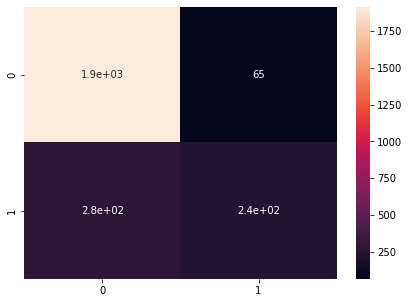

In [ ]:
from sklearn import metrics
print('Confusion Matrix')
print('___'*10)
cm=metrics.confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)
print("accuracy score -",metrics.accuracy_score(y_test,y_pred))